In [8]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import sklearn
import random
from unicodedata import normalize
import librosa.display

In [2]:
DATA_DIR = 'Data/Audio/'

In [3]:
wav, sr = librosa.load('Data/Audio/긍1.wav')
print('sr : ', sr)
print('wav shape : ', wav.shape)
print('length : ', wav.shape[0]/float(sr), 'secs')

sr :  22050
wav shape :  (101364,)
length :  4.597006802721088 secs


In [6]:
trainset = []
testset = []

train_X = []
train_mfccs = []
train_y = []

test_X = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros(i-a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

frame_length = 0.025
frame_stride = 0.0010

C:\Users\kwarkmc\AppData\Local\Temp\ipykernel_12992\1350419262.py:11: FutureWarning: Pass y=[-0.00013476 -0.00031199 -0.0003094  ... -0.00021771 -0.00032605
 -0.00037795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
C:\Users\kwarkmc\.conda\envs\capstone\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\kwarkmc\.conda\envs\capstone\lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
C:\Users\kwarkmc\AppData\Local\Temp\ipykernel_12992\1350419262.py:11: FutureWarning: Pass y=[ 1.0

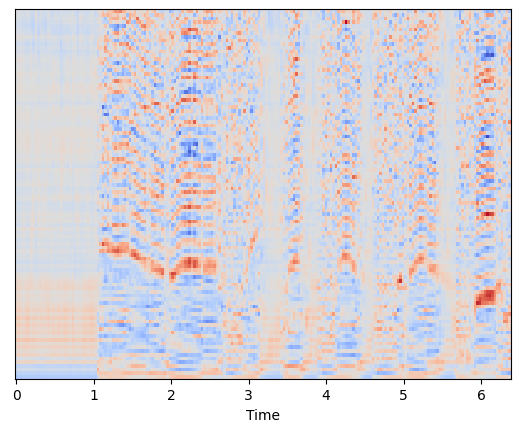

In [12]:
# train data를 넣는다.
for filename in os.listdir(DATA_DIR):
  filename = normalize('NFC', filename)
  try:
    # wav 포맷 데이터만 사용
    if '.wav' not in filename in filename:
      continue
      
    wav, sr = librosa.load(DATA_DIR + filename, sr=16000)
    
    mfcc = librosa.feature.mfcc(wav, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 200)

    # 추임새 별로 dataset에 추가
    if filename[0] == '긍':
      trainset.append((padded_mfcc, 0))
      librosa.display.specshow(padded_mfcc, sr=sr, x_axis='time')
    elif filename[0] == '부':
      trainset.append((padded_mfcc, 1))
      librosa.display.specshow(padded_mfcc, sr=sr, x_axis='time')
  except Exception as e:
    print(filename, e)
    raise

# 학습 데이터를 무작위로 섞는다.
random.shuffle(trainset)

[(array([[-1.3955537 , -1.3417788 , -1.305568  , ...,  0.664802  ,
           0.8824955 ,  1.0098721 ],
         [-1.3289942 , -1.1685692 , -1.0393443 , ..., -0.8317266 ,
           0.15435334,  0.5344147 ],
         [-0.3451523 , -0.18534276,  0.03748864, ..., -0.00208232,
           1.0978982 ,  1.2135886 ],
         ...,
         [ 0.07334935, -0.5849954 , -0.5893522 , ...,  0.5195925 ,
          -0.12558165, -0.14573812],
         [ 0.34293795, -0.32735878,  0.16351949, ..., -0.18953834,
           1.0904839 ,  0.93538415],
         [ 0.5452737 ,  0.05174916,  0.4658318 , ..., -0.7183496 ,
           0.31174508,  0.40782225]], dtype=float32),
  1),
 (array([[-1.1457374 , -1.1222212 , -1.0707968 , ...,  1.3652213 ,
           1.2643087 ,  1.1439837 ],
         [-1.1374743 , -1.0499346 , -0.8733153 , ...,  1.0056624 ,
           1.1610626 ,  1.188002  ],
         [-0.383706  , -0.19522476,  0.08932144, ...,  0.05491439,
           0.09461477,  0.20030788],
         ...,
         [ 0.